In [184]:
# Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [185]:
df_bank = pd.read_csv('../data/banco.csv', sep=',')


In [186]:
df_bank.head(5)

,Fecha,Referencia,Transacción,Descripción,Débito,Crédito,Saldo total,Tipo,Proveedor/unidad,Categoria,Subcategoria,Detalle
0,07-Mar-2023,NaN,40,DEPOSITO,NaN,"$31,500.00","$31,500.00",INGRESO,DEPOSITO,GASTO COMUN,INGRESO POR TRANSFERENCIA ENTRE CUENTAS,Transferencia entre cuentas
1,15-Mar-2023,NaN,40,DEPOSITO,NaN,"$18,738.23","$50,238.23",INGRESO,DEPOSITO,GASTO COMUN,INGRESO POR TRANSFERENCIA ENTRE CUENTAS,Transferencia entre cuentas
2,15-Mar-2023,447.0,50,COMISION IMPUESTO CSS (CAJA DE SEGURO SOCIAL),$3.21,NaN,"$50,235.02",EGRESO,CAJA DE SEGURO SOCIAL,"GASTOS DE SALARIOS, PLANILLAS Y OTROS",PERSONAL CONTRATADO,Prestaciones laborales
3,15-Mar-2023,444.0,50,PAGO CSS (CAJA DE SEGURO SOCIAL) - (22659782),$379.49,NaN,"$49,855.53",EGRESO,CAJA DE SEGURO SOCIAL,"GASTOS DE SALARIOS, PLANILLAS Y OTROS",PERSONAL CONTRATADO,Prestaciones laborales
4,15-Mar-2023,NaN,2519,BANCA EN LINEA TRANSFERENCIA A 0323010784708 D...,$270.23,NaN,"$49,585.30",EGRESO,DISTRIBUIDORA SOSTENIBLE SA,"OPERACION, REPARACION Y MANTENIMIENTO",INSUMOS OPERATIVOS,Insumos de limpieza


In [187]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fecha             2357 non-null   object 
 1   Referencia        847 non-null    float64
 2   Transacción       2357 non-null   int64  
 3   Descripción       2357 non-null   object 
 4   Débito            708 non-null    object 
 5   Crédito           1649 non-null   object 
 6   Saldo total       2357 non-null   object 
 7   Tipo              2357 non-null   object 
 8   Proveedor/unidad  2357 non-null   object 
 9   Categoria         2357 non-null   object 
 10  Subcategoria      2357 non-null   object 
 11  Detalle           2357 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 221.1+ KB


In [188]:
df_bank['Fecha'] = pd.to_datetime(df_bank['Fecha'])


In [189]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Fecha             2357 non-null   datetime64[ns]
 1   Referencia        847 non-null    float64       
 2   Transacción       2357 non-null   int64         
 3   Descripción       2357 non-null   object        
 4   Débito            708 non-null    object        
 5   Crédito           1649 non-null   object        
 6   Saldo total       2357 non-null   object        
 7   Tipo              2357 non-null   object        
 8   Proveedor/unidad  2357 non-null   object        
 9   Categoria         2357 non-null   object        
 10  Subcategoria      2357 non-null   object        
 11  Detalle           2357 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 221.1+ KB


In [190]:
def convert_to_float(value):
    if pd.isnull(value):
        return None
    return float(str(value).replace('$', '').replace(',', ''))

df_bank['Débito'] = df_bank['Débito'].apply(convert_to_float)
df_bank['Crédito'] = df_bank['Crédito'].apply(convert_to_float)
df_bank['Saldo total'] = df_bank['Saldo total'].apply(convert_to_float)

In [191]:
df_bank.head(5)

,Fecha,Referencia,Transacción,Descripción,Débito,Crédito,Saldo total,Tipo,Proveedor/unidad,Categoria,Subcategoria,Detalle
0,2023-03-07,NaN,40,DEPOSITO,NaN,31500.00,31500.00,INGRESO,DEPOSITO,GASTO COMUN,INGRESO POR TRANSFERENCIA ENTRE CUENTAS,Transferencia entre cuentas
1,2023-03-15,NaN,40,DEPOSITO,NaN,18738.23,50238.23,INGRESO,DEPOSITO,GASTO COMUN,INGRESO POR TRANSFERENCIA ENTRE CUENTAS,Transferencia entre cuentas
2,2023-03-15,447.0,50,COMISION IMPUESTO CSS (CAJA DE SEGURO SOCIAL),3.21,NaN,50235.02,EGRESO,CAJA DE SEGURO SOCIAL,"GASTOS DE SALARIOS, PLANILLAS Y OTROS",PERSONAL CONTRATADO,Prestaciones laborales
3,2023-03-15,444.0,50,PAGO CSS (CAJA DE SEGURO SOCIAL) - (22659782),379.49,NaN,49855.53,EGRESO,CAJA DE SEGURO SOCIAL,"GASTOS DE SALARIOS, PLANILLAS Y OTROS",PERSONAL CONTRATADO,Prestaciones laborales
4,2023-03-15,NaN,2519,BANCA EN LINEA TRANSFERENCIA A 0323010784708 D...,270.23,NaN,49585.30,EGRESO,DISTRIBUIDORA SOSTENIBLE SA,"OPERACION, REPARACION Y MANTENIMIENTO",INSUMOS OPERATIVOS,Insumos de limpieza


In [192]:
df_bank['Tipo'] = df_bank['Tipo'].astype('category')
df_bank['Proveedor/unidad'] = df_bank['Proveedor/unidad'].astype('category')
df_bank['Categoria'] = df_bank['Categoria'].astype('category')
df_bank['Subcategoria'] = df_bank['Subcategoria'].astype('category')

In [193]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Fecha             2357 non-null   datetime64[ns]
 1   Referencia        847 non-null    float64       
 2   Transacción       2357 non-null   int64         
 3   Descripción       2357 non-null   object        
 4   Débito            708 non-null    float64       
 5   Crédito           1649 non-null   float64       
 6   Saldo total       2357 non-null   float64       
 7   Tipo              2357 non-null   category      
 8   Proveedor/unidad  2357 non-null   category      
 9   Categoria         2357 non-null   category      
 10  Subcategoria      2357 non-null   category      
 11  Detalle           2357 non-null   object        
dtypes: category(4), datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 170.2+ KB


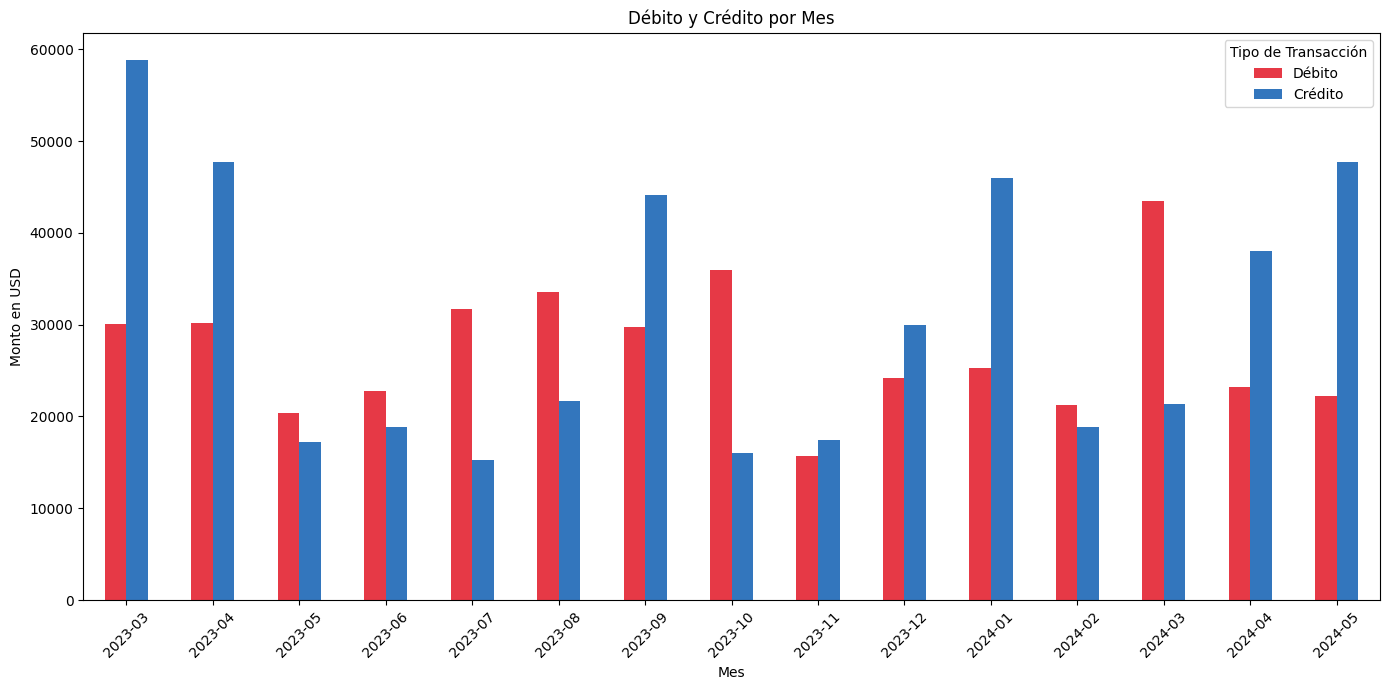

In [194]:
df_bank['Mes'] = df_bank['Fecha'].dt.to_period('M')

debito_por_mes = df_bank.groupby('Mes')['Débito'].sum()
credito_por_mes = df_bank.groupby('Mes')['Crédito'].sum()

df_debitos_creditos = pd.DataFrame({
    'Débito': debito_por_mes,
    'Crédito': credito_por_mes
}).fillna(0)

ax = df_debitos_creditos.plot(kind='bar', stacked=False, figsize=(14, 7), color=['#E63946', '#3376BD'])
plt.title('Débito y Crédito por Mes')
plt.xlabel('Mes')
plt.ylabel('Monto en USD')
plt.legend(title='Tipo de Transacción')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/5f/8wn5rtw909qbjlpmf_jgrh4h0000gn/T/ipykernel_38435/242975025.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_egreso['Año'] = df_egreso['Fecha'].dt.year
/var/folders/5f/8wn5rtw909qbjlpmf_jgrh4h0000gn/T/ipykernel_38435/242975025.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gastos_por_subcategoria_2023 = df_egreso_2023.groupby('Subcategoria')['Débito'].sum()
/var/folders/5f/8wn5rtw909qbjlpmf_jgrh4h0000gn/T/ipykernel_38435/242975025.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a futu

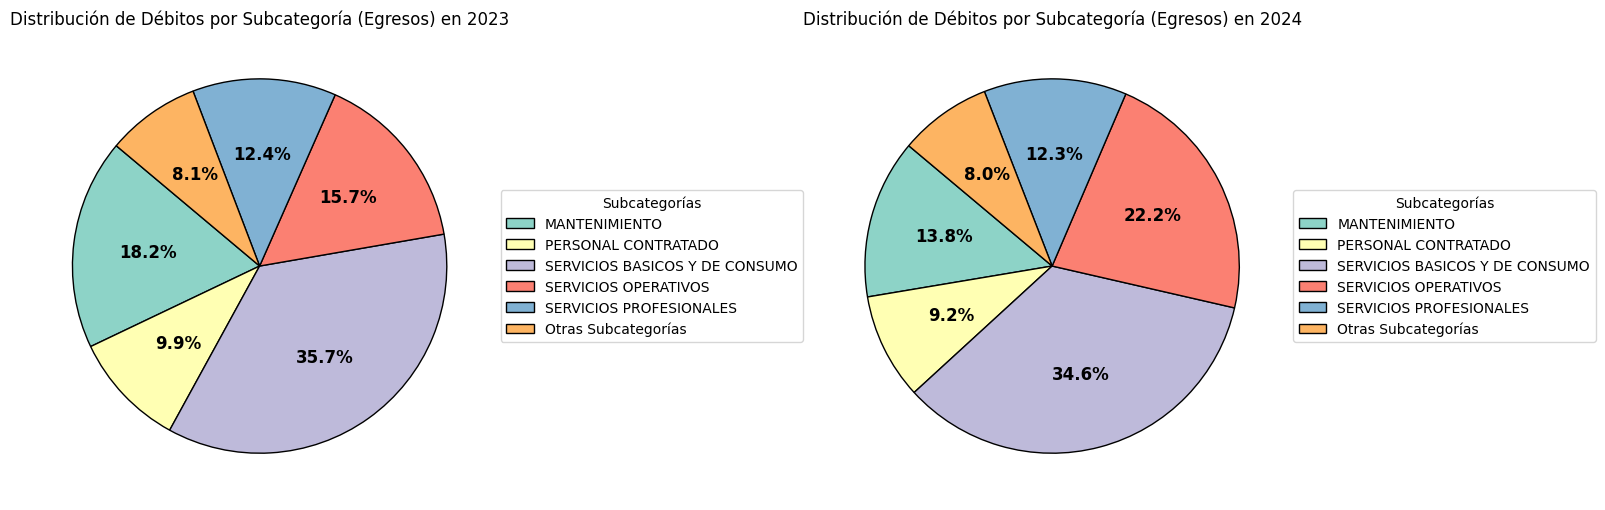

In [195]:
df_bank['Tipo'] = df_bank['Tipo'].str.strip().str.lower()

df_egreso = df_bank[df_bank['Tipo'] == 'egreso']

df_egreso['Año'] = df_egreso['Fecha'].dt.year
df_egreso_2023 = df_egreso[df_egreso['Año'] == 2023]
df_egreso_2024 = df_egreso[df_egreso['Año'] == 2024]

gastos_por_subcategoria_2023 = df_egreso_2023.groupby('Subcategoria')['Débito'].sum()
gastos_por_subcategoria_2024 = df_egreso_2024.groupby('Subcategoria')['Débito'].sum()

def agrupar_subcategorias(gastos_por_subcategoria):
    total_gastos = gastos_por_subcategoria.sum()
    porcentaje_por_subcategoria = gastos_por_subcategoria / total_gastos
    umbral = 0.038
    gastos_agrupados = gastos_por_subcategoria[porcentaje_por_subcategoria >= umbral]
    gastos_agrupados['Otras Subcategorías'] = gastos_por_subcategoria[porcentaje_por_subcategoria < umbral].sum()
    return gastos_agrupados

gastos_agrupados_2023 = agrupar_subcategorias(gastos_por_subcategoria_2023)
gastos_agrupados_2024 = agrupar_subcategorias(gastos_por_subcategoria_2024)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

wedges1, texts1, autotexts1 = ax1.pie(gastos_agrupados_2023, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors, wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 12})
ax1.set_title('Distribución de Débitos por Subcategoría (Egresos) en 2023')
ax1.legend(wedges1, gastos_agrupados_2023.index, title="Subcategorías", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

wedges2, texts2, autotexts2 = ax2.pie(gastos_agrupados_2024, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors, wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 12})
ax2.set_title('Distribución de Débitos por Subcategoría (Egresos) en 2024')
ax2.legend(wedges2, gastos_agrupados_2024.index, title="Subcategorías", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts1 + autotexts2, size=12, weight="bold")
plt.tight_layout()
plt.show()

/var/folders/5f/8wn5rtw909qbjlpmf_jgrh4h0000gn/T/ipykernel_38435/3125057163.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_egreso['Año'] = df_egreso['Fecha'].dt.year
/var/folders/5f/8wn5rtw909qbjlpmf_jgrh4h0000gn/T/ipykernel_38435/3125057163.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gastos_por_proveedor_2023 = df_egreso_2023.groupby('Proveedor/unidad')['Débito'].sum().sort_values(ascending=False).head(3)
/var/folders/5f/8wn5rtw909qbjlpmf_jgrh4h0000gn/T/ipykernel_38435/3125057163.py:11: FutureWarning: The default of observed=False is deprec

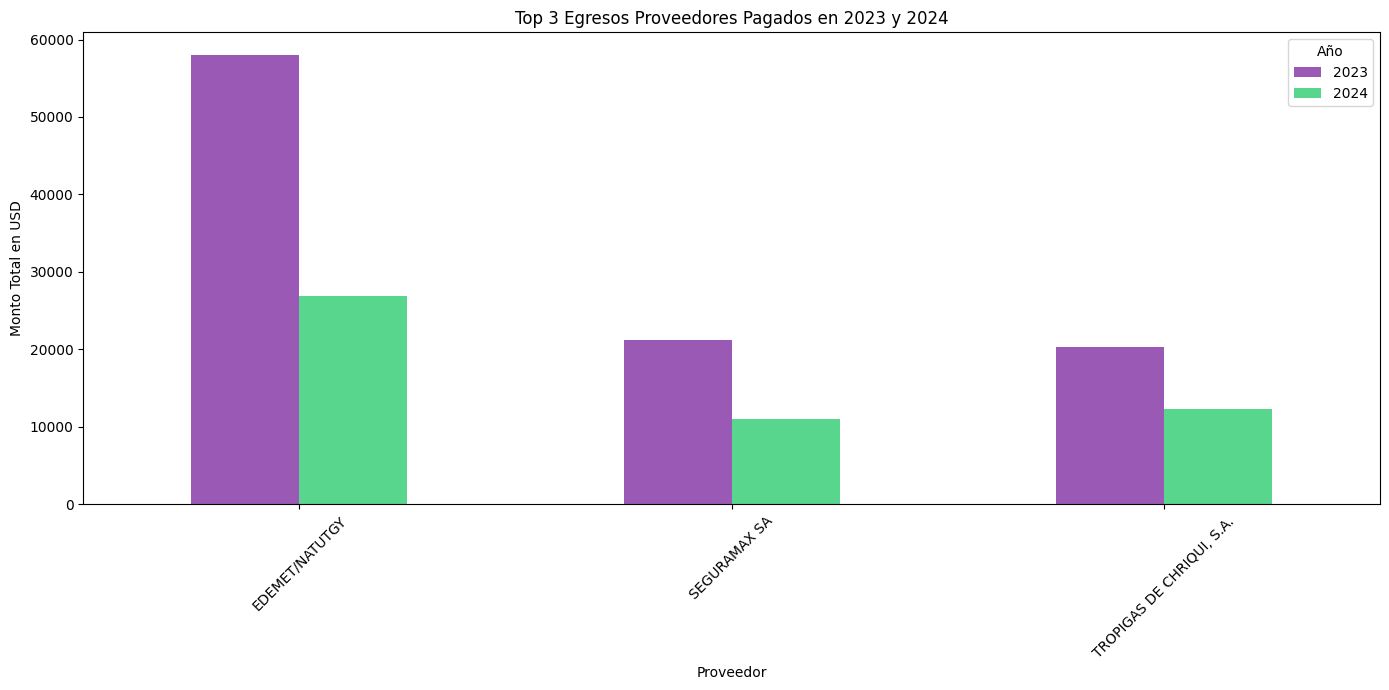

In [196]:
df_bank['Tipo'] = df_bank['Tipo'].str.strip().str.lower()

df_egreso = df_bank[df_bank['Tipo'] == 'egreso']

df_egreso['Año'] = df_egreso['Fecha'].dt.year

df_egreso_2023 = df_egreso[df_egreso['Año'] == 2023]
df_egreso_2024 = df_egreso[df_egreso['Año'] == 2024]

gastos_por_proveedor_2023 = df_egreso_2023.groupby('Proveedor/unidad')['Débito'].sum().sort_values(ascending=False).head(3)
gastos_por_proveedor_2024 = df_egreso_2024.groupby('Proveedor/unidad')['Débito'].sum().sort_values(ascending=False).head(3)

df_top_proveedores = pd.DataFrame({
    '2023': gastos_por_proveedor_2023,
    '2024': gastos_por_proveedor_2024
}).fillna(0)

df_top_proveedores.plot(kind='bar', figsize=(14, 7), color=['#9B59B6', '#58D68D'])
plt.title('Top 3 Egresos Proveedores Pagados en 2023 y 2024')
plt.xlabel('Proveedor')
plt.ylabel('Monto Total en USD')
plt.legend(title='Año')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/5f/8wn5rtw909qbjlpmf_jgrh4h0000gn/T/ipykernel_38435/2519759654.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_egreso['Año'] = df_egreso['Fecha'].dt.year
/var/folders/5f/8wn5rtw909qbjlpmf_jgrh4h0000gn/T/ipykernel_38435/2519759654.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_egreso['Mes'] = df_egreso['Fecha'].dt.to_period('M')


<Figure size 1400x700 with 0 Axes>

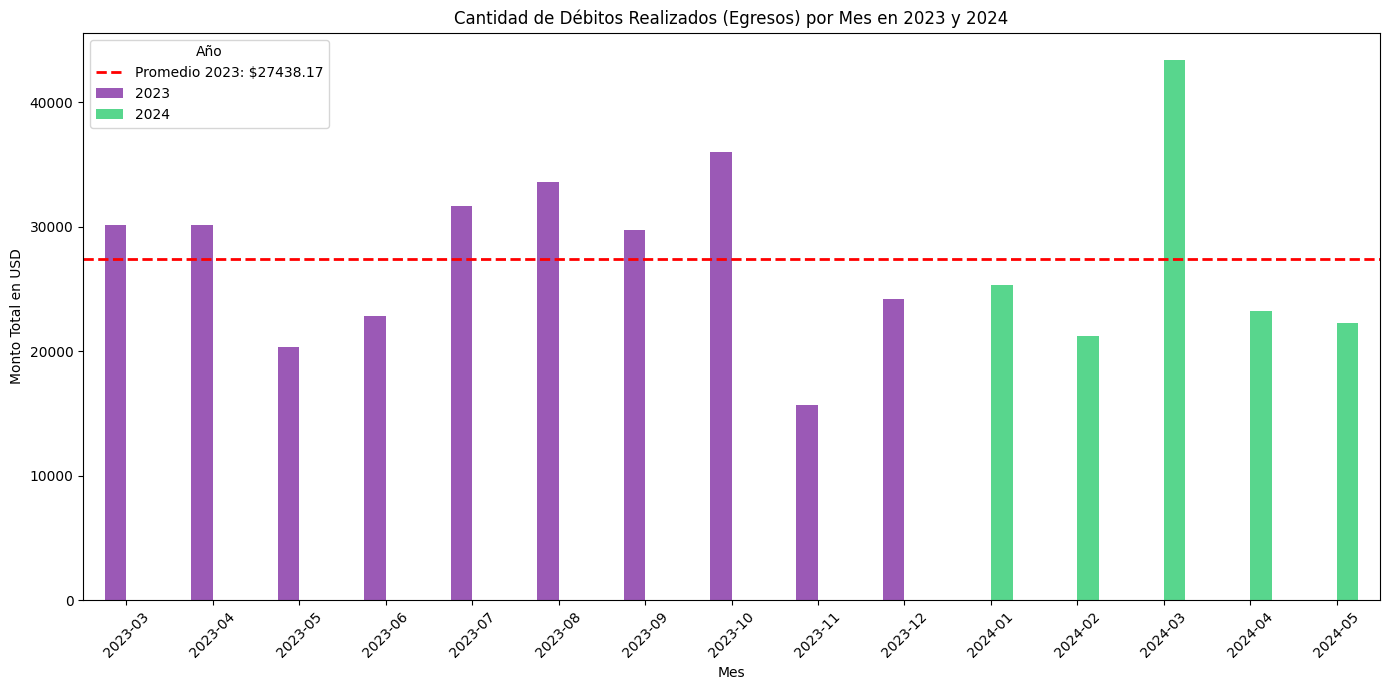

In [197]:
df_egreso = df_bank[df_bank['Tipo'].str.strip().str.lower() == 'egreso']

df_egreso['Año'] = df_egreso['Fecha'].dt.year
df_egreso['Mes'] = df_egreso['Fecha'].dt.to_period('M')

df_egreso_2023 = df_egreso[df_egreso['Año'] == 2023]
df_egreso_2024 = df_egreso[df_egreso['Año'] == 2024]

debitos_por_mes_2023 = df_egreso_2023.groupby('Mes')['Débito'].sum()
debitos_por_mes_2024 = df_egreso_2024.groupby('Mes')['Débito'].sum()

promedio_2023 = debitos_por_mes_2023.mean()

df_debitos_por_mes = pd.DataFrame({
    '2023': debitos_por_mes_2023,
    '2024': debitos_por_mes_2024
}).fillna(0)

plt.figure(figsize=(14, 7))
ax = df_debitos_por_mes.plot(kind='bar', figsize=(14, 7), color=['#9B59B6', '#58D68D'])
plt.axhline(promedio_2023, color='r', linestyle='--', linewidth=2, label=f'Promedio 2023: ${promedio_2023:.2f}')
plt.title('Cantidad de Débitos Realizados (Egresos) por Mes en 2023 y 2024')
plt.xlabel('Mes')
plt.ylabel('Monto Total en USD')
plt.legend(title='Año')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/5f/8wn5rtw909qbjlpmf_jgrh4h0000gn/T/ipykernel_38435/3353548179.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gastos_por_subcategoria_marzo = df_marzo_2024.groupby('Subcategoria')['Débito'].sum()


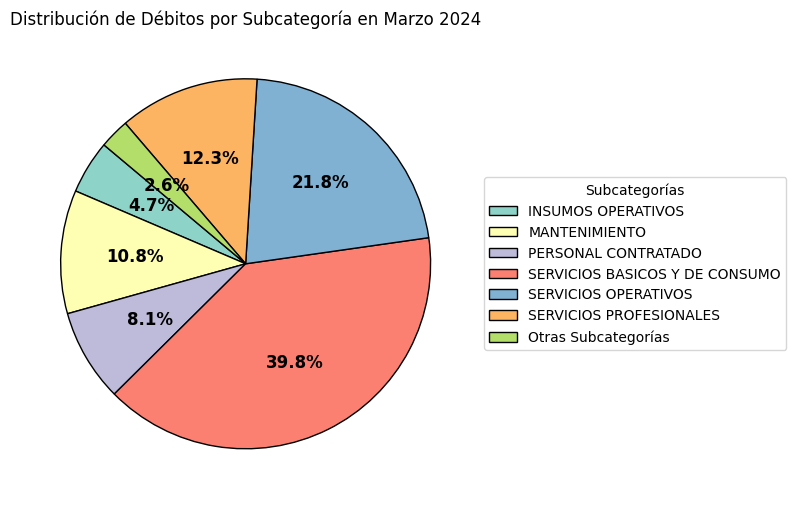

/var/folders/5f/8wn5rtw909qbjlpmf_jgrh4h0000gn/T/ipykernel_38435/3353548179.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gastos_por_proveedor_marzo = df_marzo_2024.groupby('Proveedor/unidad')['Débito'].sum().sort_values(ascending=False).head(5)


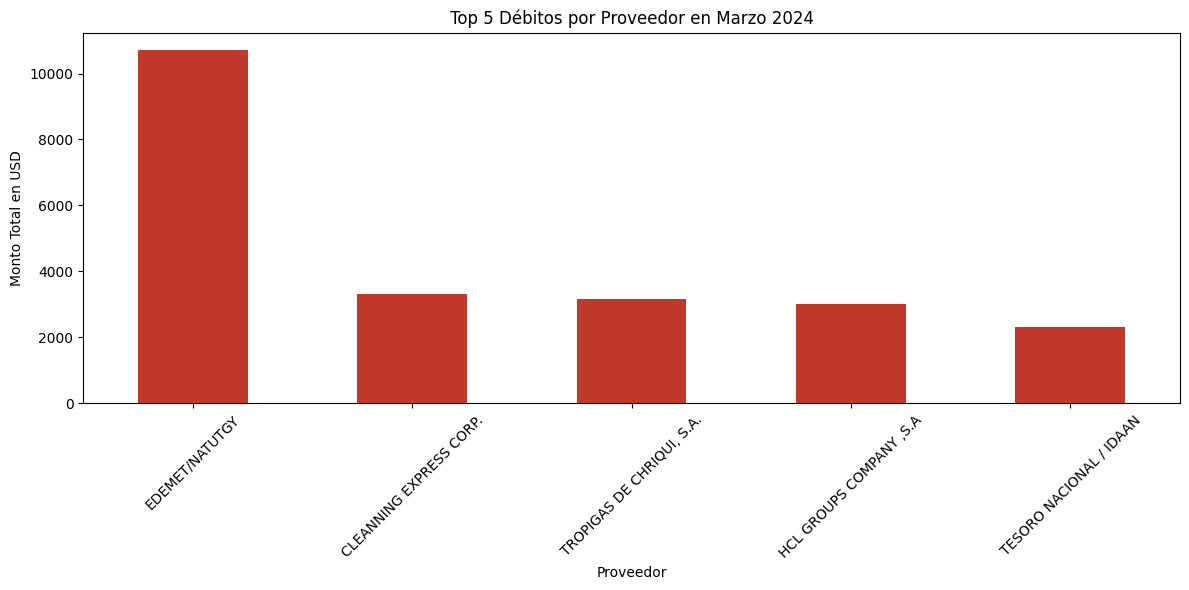

In [198]:
df_bank['Tipo'] = df_bank['Tipo'].str.strip().str.lower()

df_egreso = df_bank[df_bank['Tipo'] == 'egreso']

df_marzo_2024 = df_egreso[(df_egreso['Fecha'].dt.year == 2024) & (df_egreso['Fecha'].dt.month == 3)]

gastos_por_subcategoria_marzo = df_marzo_2024.groupby('Subcategoria')['Débito'].sum()

def agrupar_subcategorias(gastos_por_subcategoria):
    total_gastos = gastos_por_subcategoria.sum()
    porcentaje_por_subcategoria = gastos_por_subcategoria / total_gastos
    umbral = 0.023
    gastos_agrupados = gastos_por_subcategoria[porcentaje_por_subcategoria >= umbral]
    gastos_agrupados['Otras Subcategorías'] = gastos_por_subcategoria[porcentaje_por_subcategoria < umbral].sum()
    return gastos_agrupados

gastos_agrupados_marzo = agrupar_subcategorias(gastos_por_subcategoria_marzo)

fig, ax1 = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax1.pie(gastos_agrupados_marzo, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors, wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 12})
ax1.set_title('Distribución de Débitos por Subcategoría en Marzo 2024')
ax1.legend(wedges, gastos_agrupados_marzo.index, title="Subcategorías", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12, weight="bold")
plt.tight_layout()
plt.show()

gastos_por_proveedor_marzo = df_marzo_2024.groupby('Proveedor/unidad')['Débito'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(12, 6))
gastos_por_proveedor_marzo.plot(kind='bar', color='#C0392B')
plt.title('Top 5 Débitos por Proveedor en Marzo 2024')
plt.xlabel('Proveedor')
plt.ylabel('Monto Total en USD')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()